In [1]:
print("hello world.")

hello world.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def fkLeg():
    """
    Forward kinematics for a single leg (hip -> knee -> ankle) scaled by total height h.
    - h: full body height (units determined by 'units' flag)
    - thigh_angle_deg: angle of thigh relative to vertical down (deg). 0 = straight down.
                        positive rotates forward (toward +x).
    - knee_flexion_deg: flexion at knee (deg). 0 => shank continues in same direction as thigh.
                        positive bends the shank toward the back (standard sign choice).
    Returns: dict with hip, knee, ankle coordinates (x, y).
    """


In [20]:
def plotLeg():

    startPoint = (0, -50) # Starting point (x, y)
    h = 170 #cm
    ankle = startPoint
    knee = (startPoint[0], 0.26 * h + startPoint[1])
    hip  = (startPoint[0], 0.53 * h + startPoint[1])

    # Define your points (x, y)
    x = [ankle[0], knee[0], hip[0]]
    y = [ankle[1], knee[1], hip[1]]

    # Plot the points
    plt.scatter(x, y, color="red", label="Joints")

    # Change domain (x-axis) and range (y-axis)
    plt.xlim(-150, 150)   # Domain: from 0 to 8
    plt.ylim(-150, 150)   # Range: from 0 to 8

    # Add labels
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Plotting Three Points")
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def fk_leg(h, startPoint=(0, -50)):
    """
    Forward kinematics for a simple vertical leg (ankle -> knee -> hip).
    h: total body height (cm)
    startPoint: (x, y) coordinate for ankle
    Returns a dict with ankle, knee, and hip coordinates.
    """
    ankle = startPoint
    knee = (startPoint[0], 0.26 * h + startPoint[1])
    hip  = (startPoint[0], 0.53 * h + startPoint[1])

    return {"ankle": ankle, "knee": knee, "hip": hip}


def plot_leg(joints):
    """
    Plots the leg given joint coordinates.
    joints: dict with keys 'ankle', 'knee', 'hip'
    """
    x = [joints["ankle"][0], joints["knee"][0], joints["hip"][0]]
    y = [joints["ankle"][1], joints["knee"][1], joints["hip"][1]]

    # Plot the joints
    plt.scatter(x, y, color="red", label="Joints")
    plt.plot(x, y, color="blue", linewidth=2)  # connect them

    # Formatting
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Leg Forward Kinematics")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage
h = 170  # cm
joints = fk_leg(h, startPoint=(0, -50))
plot_leg(joints)

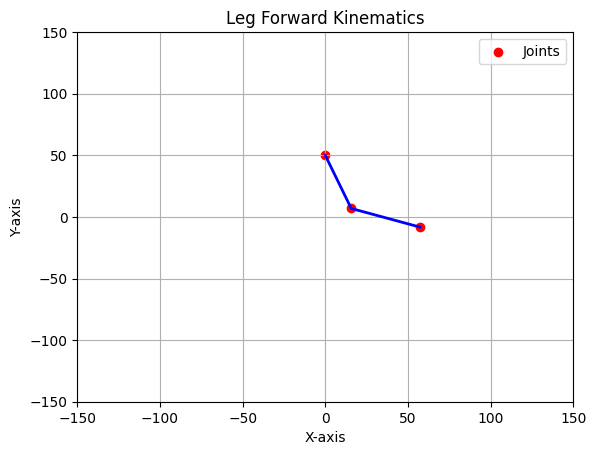

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fk_leg(h, thigh_angle_deg=0.0, knee_flexion_deg=0.0, hipPoint=(0, 0)):
    """
    Forward kinematics for a single leg (hip -> knee -> ankle).
    
    h: body height in cm
    thigh_angle_deg: angle of thigh relative to vertical down (deg). 0 = straight down.
                     Positive = forward (towards +x).
    knee_flexion_deg: flexion at knee (deg). 0 = straight line. Positive bends backward.
    hipPoint: (x,y) coordinate of hip joint (cm)
    
    Returns dict with hip, knee, ankle coordinates.
    """
    # Segment lengths (proportional to body height, in cm)
    thigh_len = 0.27 * h
    shank_len = 0.26 * h

    # Convert to radians
    th = np.deg2rad(thigh_angle_deg)
    phi = np.deg2rad(knee_flexion_deg)

    # Hip
    hip = np.array(hipPoint)

    # Knee position
    v_thigh = np.array([np.sin(th), -np.cos(th)]) * thigh_len
    knee = hip + v_thigh

    # Ankle position (shank rotated relative to thigh)
    shank_angle = th + phi
    v_shank = np.array([np.sin(shank_angle), -np.cos(shank_angle)]) * shank_len
    ankle = knee + v_shank

    return {
        "hip": tuple(hip),
        "knee": tuple(knee),
        "ankle": tuple(ankle)
    }


def plot_leg(joints):
    """
    Plot the leg given joint coordinates.
    joints: dict with keys 'ankle', 'knee', 'hip'
    """
    x = [joints["hip"][0], joints["knee"][0], joints["ankle"][0]]
    y = [joints["hip"][1], joints["knee"][1], joints["ankle"][1]]

    plt.scatter(x, y, color="red", label="Joints")
    plt.plot(x, y, color="blue", linewidth=2)

    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Leg Forward Kinematics")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage
h = 170  # cm
joints = fk_leg(h, thigh_angle_deg=20, knee_flexion_deg=50, hipPoint=(0, 50))
plot_leg(joints)


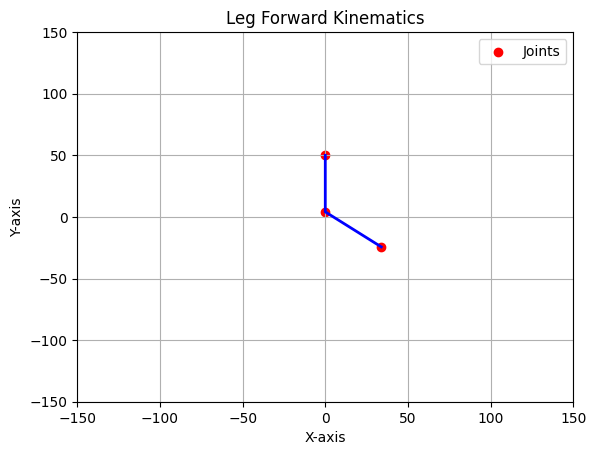

In [8]:
plot_leg(fk_leg(h, thigh_angle_deg=0, knee_flexion_deg=50, hipPoint=(0, 50)))